# 📊 Customer Segmentation Using RFM Analysis

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

## 1. Load Dataset


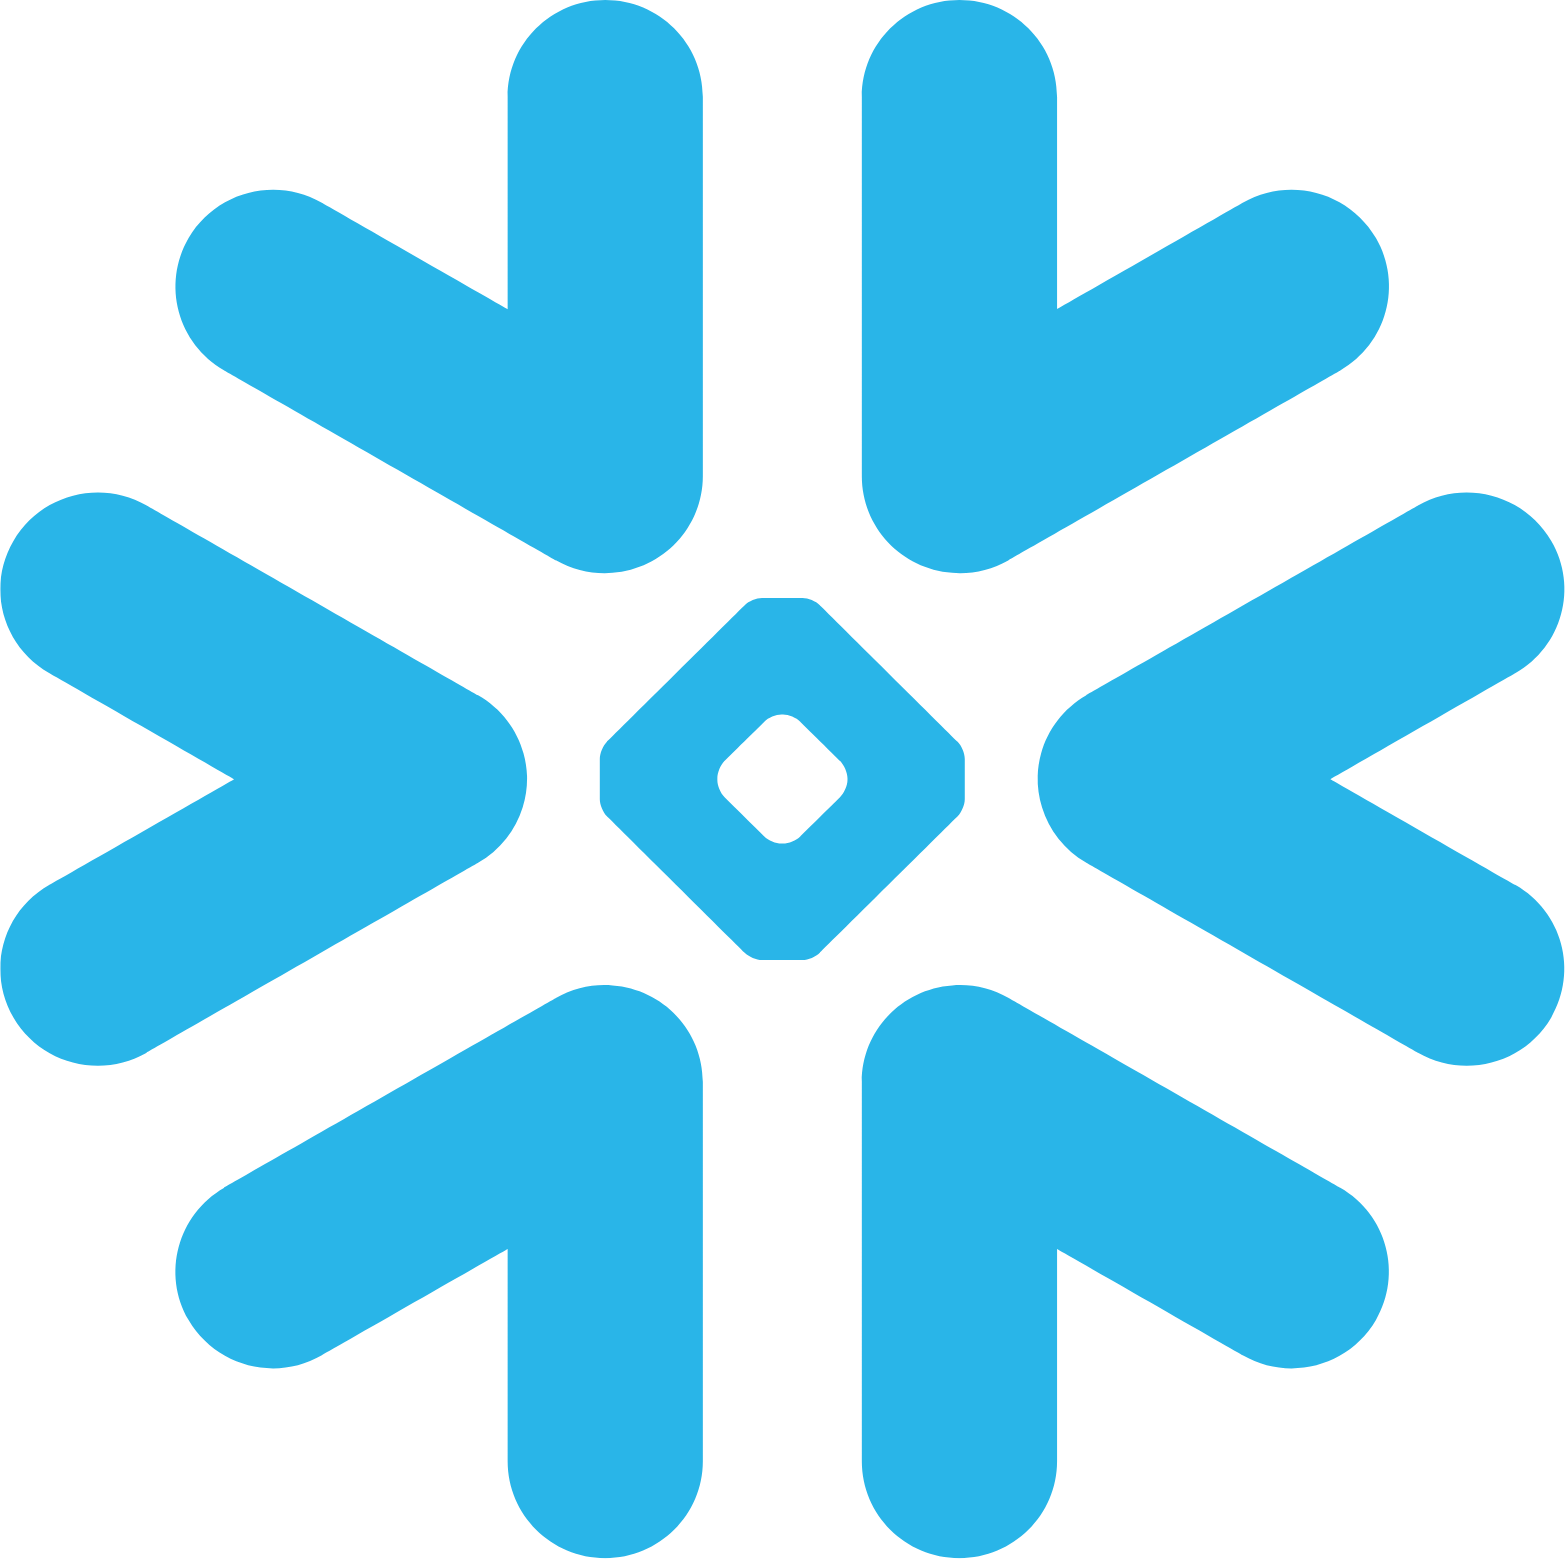

In [15]:
df = pd.read_excel(r'C:\Users\Maged\Desktop\TASK 3\Online_Retail.xlsx')
df.head()

## 2. Clean Data

In [19]:
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 3. Calculate RFM Metrics


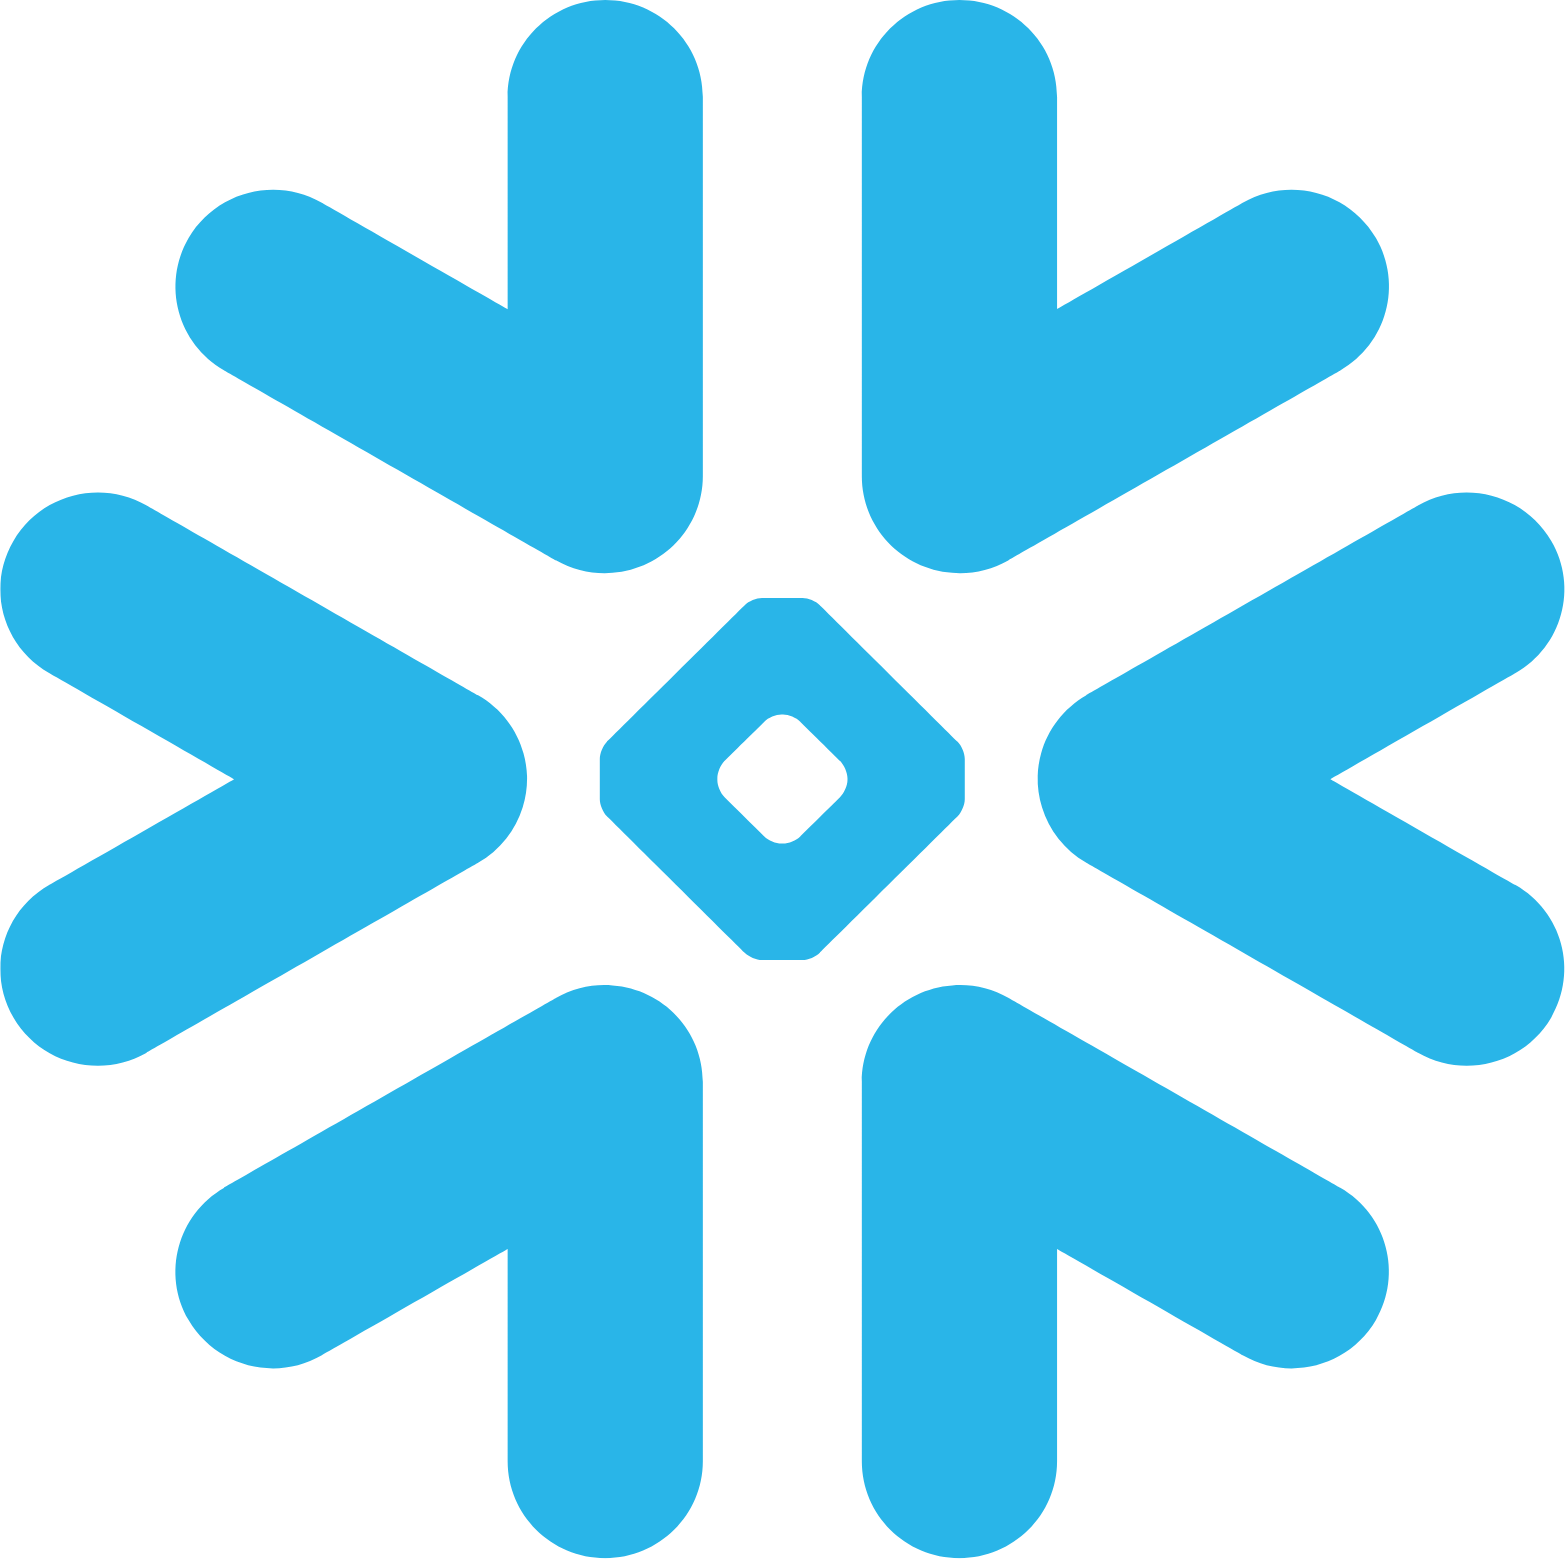

In [21]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

## 4. RFM Scoring


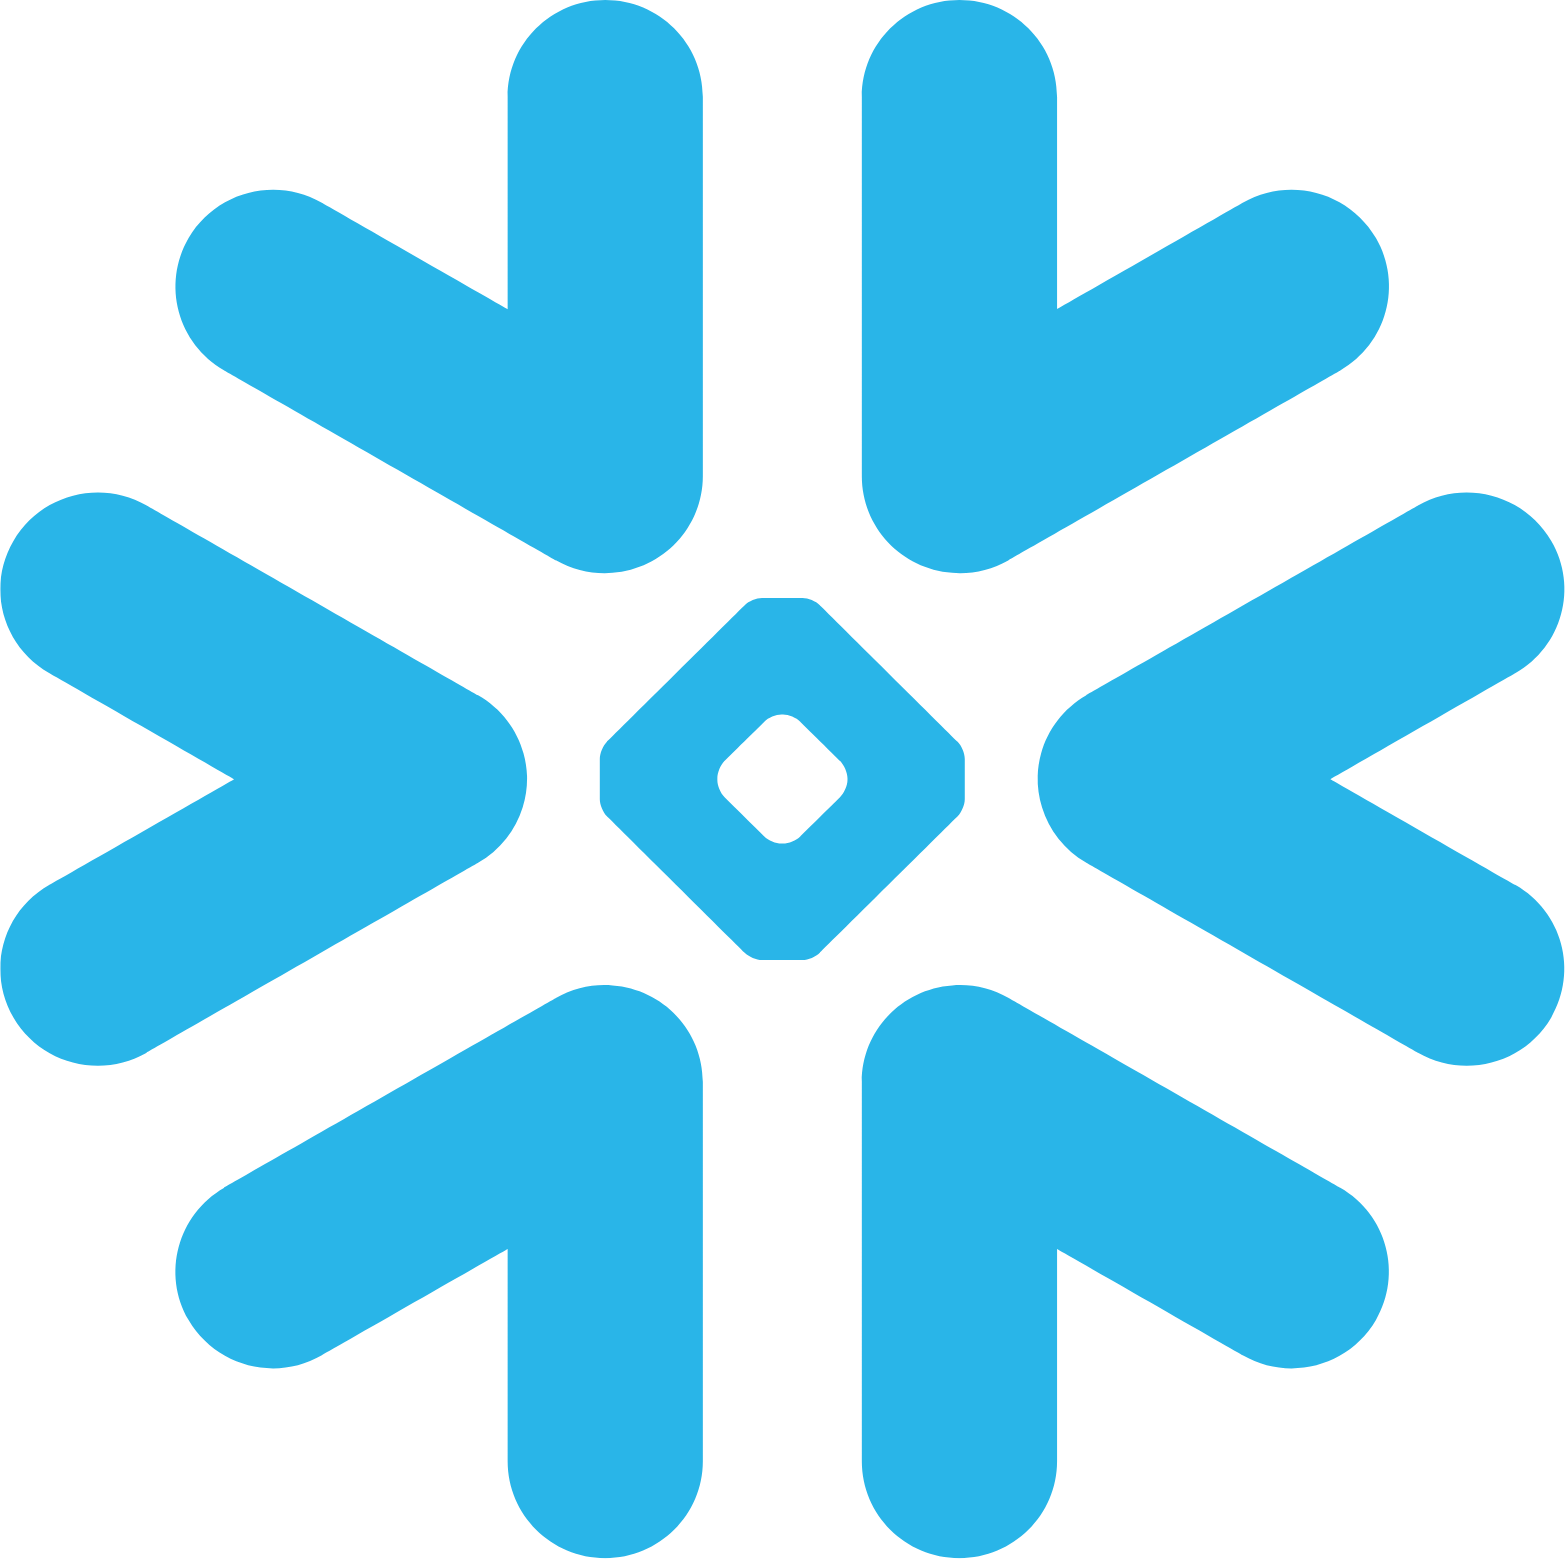

In [23]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)
rfm.head()

## 5. Segment Customers


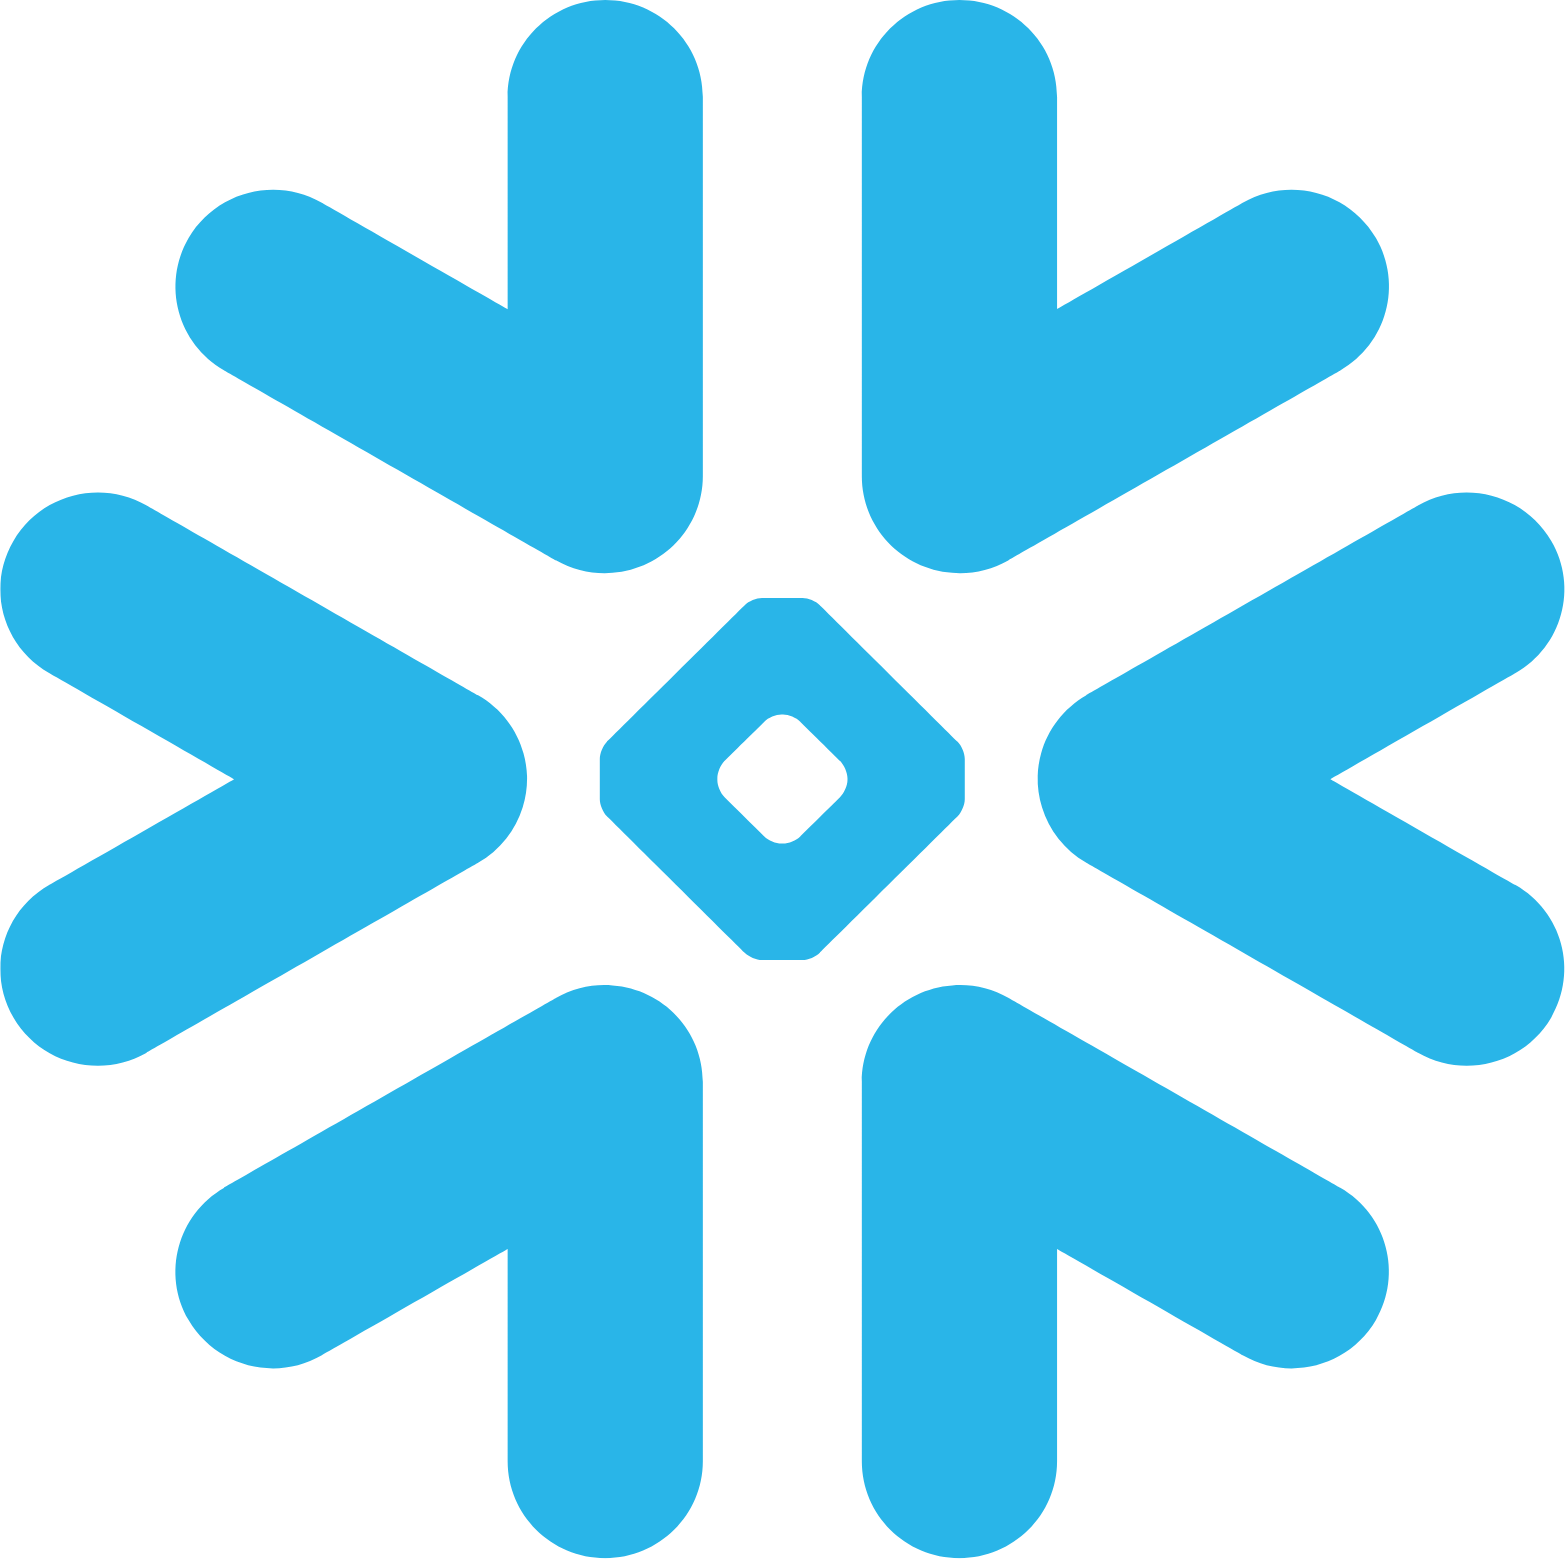

In [25]:
rfm['Segment'] = 'Others'
rfm.loc[rfm['RFM_Score'] >= 9, 'Segment'] = 'Champions'
rfm.loc[rfm['RFM_Score'] <= 5, 'Segment'] = 'At Risk'
rfm.head()

## 6. Visualize Segments

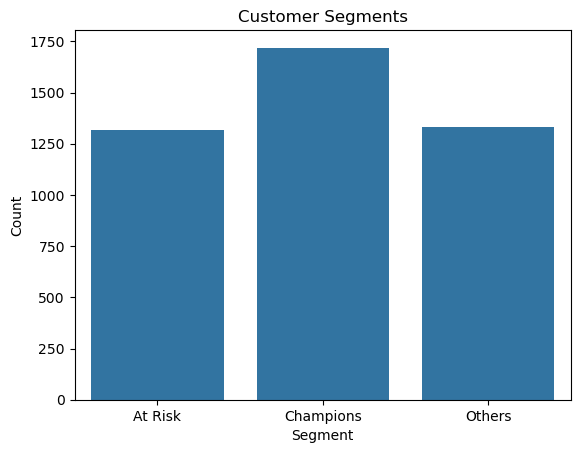

In [27]:
sns.countplot(data=rfm, x='Segment')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()